# Importing libraries

In [4]:
import os
import sys
import time
import wave

from IPython.display import Audio

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import librosa
import librosa.display

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [5]:
audio_dir="/content/drive/MyDrive/ALL"

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
audio_dir

'/content/drive/MyDrive/ALL'

# Extracting the audio paths from the audio directory

In [8]:
audio_files = [os.path.join(audio_dir, f) for f in os.listdir(audio_dir) if f.endswith('.wav')]

In [9]:
audio_files

['/content/drive/MyDrive/ALL/DC_a01.wav',
 '/content/drive/MyDrive/ALL/DC_a07.wav',
 '/content/drive/MyDrive/ALL/DC_a02.wav',
 '/content/drive/MyDrive/ALL/DC_a04.wav',
 '/content/drive/MyDrive/ALL/DC_a08.wav',
 '/content/drive/MyDrive/ALL/DC_a10.wav',
 '/content/drive/MyDrive/ALL/DC_a03.wav',
 '/content/drive/MyDrive/ALL/DC_a06.wav',
 '/content/drive/MyDrive/ALL/DC_a11.wav',
 '/content/drive/MyDrive/ALL/DC_a13.wav',
 '/content/drive/MyDrive/ALL/DC_a12.wav',
 '/content/drive/MyDrive/ALL/DC_a05.wav',
 '/content/drive/MyDrive/ALL/DC_a09.wav',
 '/content/drive/MyDrive/ALL/DC_a14.wav',
 '/content/drive/MyDrive/ALL/DC_f06.wav',
 '/content/drive/MyDrive/ALL/DC_h02.wav',
 '/content/drive/MyDrive/ALL/DC_n02.wav',
 '/content/drive/MyDrive/ALL/DC_f15.wav',
 '/content/drive/MyDrive/ALL/DC_h14.wav',
 '/content/drive/MyDrive/ALL/DC_f11.wav',
 '/content/drive/MyDrive/ALL/DC_a15.wav',
 '/content/drive/MyDrive/ALL/DC_f04.wav',
 '/content/drive/MyDrive/ALL/DC_d01.wav',
 '/content/drive/MyDrive/ALL/DC_d0

In [10]:
for i in range(10):

    audio_path = audio_files[i]
    y, sr = librosa.load(audio_path)
    display(Audio(data=y, rate=sr))

# Generating Spectrograms (dont run this cell again)

In [12]:
# Define the path to the directory containing your audio files
audio_dir = '/content/drive/MyDrive/ALL'

# Define the list of supported audio file extensions
audio_extensions = ['.wav', '.mp3']  # Add more if needed

# Create a directory to save the spectrogram images
output_dir = '/content/drive/MyDrive/spectrograms'
os.makedirs(output_dir, exist_ok=True)

# Loop through audio files and process them
for root, _, files in os.walk(audio_dir):
    for file in files:
        if any(file.endswith(ext) for ext in audio_extensions):
            audio_path = os.path.join(root, file)
            y, sr = librosa.load(audio_path)
            spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)
            spectrogram_db = librosa.power_to_db(spectrogram, ref=np.max)

            # Save the spectrogram as an image
            output_filename = os.path.splitext(file)[0] + ".png"
            output_path = os.path.join(output_dir, output_filename)

            plt.figure(figsize=(6, 4))
            librosa.display.specshow(spectrogram_db, x_axis='time', y_axis='mel')
            plt.title('Spectrogram')
            plt.colorbar(format='%+2.0f dB')
            plt.savefig(output_path, bbox_inches='tight', pad_inches=0)
            plt.close()

KeyboardInterrupt: ignored

<Figure size 600x400 with 0 Axes>

# processing and splitting data

In [13]:
import os
import cv2
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the path to the directory containing your spectrogram images
spectrogram_dir = '/content/drive/MyDrive/spectrograms'

# Define the list of emotions as class labels
class_labels = ['angry', 'disgust', 'fearful', 'happiness', 'neutral', 'sad', 'surprised']

# Load and preprocess spectrogram images
X = []  # List to store spectrogram images
y = []  # List to store corresponding labels

for label, emotion in enumerate(class_labels):
    emotion_dir = os.path.join(spectrogram_dir, emotion)
    for image_file in os.listdir(emotion_dir):
        image_path = os.path.join(emotion_dir, image_file)

        # Load the image and resize it to 128x128 pixels in grayscale
        spectrogram = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        spectrogram = cv2.resize(spectrogram, (128, 128))

        X.append(spectrogram)
        y.append(label)


# Convert the lists to NumPy arrays
X = np.array(X)
y = np.array(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# CNN

In [14]:
# Define and compile the CNN model
from tensorflow.keras.layers import Dropout
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),  # Add dropout to reduce overfitting
    Dense(len(class_labels), activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=64)  # You can adjust the number of epochs and batch size

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_accuracy}')

Epoch 1/50
3/3 [==============================] - 4s 843ms/step - loss: 219.9012 - accuracy: 0.1071
Epoch 2/50
3/3 [==============================] - 3s 817ms/step - loss: 55.9538 - accuracy: 0.1905
Epoch 3/50
3/3 [==============================] - 3s 1s/step - loss: 4.0787 - accuracy: 0.1310
Epoch 4/50
3/3 [==============================] - 3s 869ms/step - loss: 2.4283 - accuracy: 0.1548
Epoch 5/50
3/3 [==============================] - 3s 830ms/step - loss: 2.0470 - accuracy: 0.1607
Epoch 6/50
3/3 [==============================] - 3s 826ms/step - loss: 1.9435 - accuracy: 0.1488
Epoch 7/50
3/3 [==============================] - 3s 826ms/step - loss: 1.8574 - accuracy: 0.2321
Epoch 8/50
3/3 [==============================] - 4s 1s/step - loss: 1.8125 - accuracy: 0.3036
Epoch 9/50
3/3 [==============================] - 3s 813ms/step - loss: 1.7049 - accuracy: 0.3393
Epoch 10/50
3/3 [==============================] - 3s 822ms/step - loss: 1.6251 - accuracy: 0.3810
Epoch 11/50
3/3 [=====

2/2 [==============================] - 0s 49ms/step
Accuracy: 0.5238095238095238
Classification Report:
               precision    recall  f1-score   support

       angry       0.67      0.80      0.73         5
     disgust       0.00      0.00      0.00         3
     fearful       0.50      0.29      0.36         7
   happiness       0.36      0.67      0.47         6
     neutral       0.57      0.67      0.62         6
         sad       0.80      0.57      0.67         7
   surprised       0.67      0.50      0.57         8

    accuracy                           0.52        42
   macro avg       0.51      0.50      0.49        42
weighted avg       0.56      0.52      0.52        42

Confusion Matrix:
 [[4 0 0 1 0 0 0]
 [0 0 0 0 2 1 0]
 [0 0 2 3 0 0 2]
 [2 0 0 4 0 0 0]
 [0 2 0 0 4 0 0]
 [0 1 1 0 1 4 0]
 [0 0 1 3 0 0 4]]


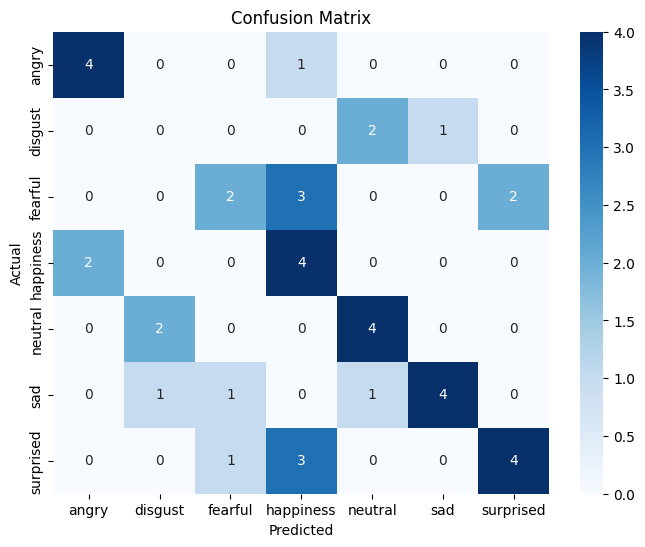

In [15]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

# Make predictions on the test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_classes)
print(f'Accuracy: {accuracy}')

# Generate and print classification report
class_names = class_labels
report = classification_report(y_test, y_pred_classes, target_names=class_names)
print("Classification Report:\n", report)

# Generate and print confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt


conf_matrix = confusion_matrix(y_test, y_pred_classes)
print("Confusion Matrix:\n", conf_matrix)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()